In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("house_price.csv")
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


Q1. Perform basic EDA 

In [18]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

In [22]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']
df['price_per_sqft'].head()


0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
Name: price_per_sqft, dtype: float64

Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
a) Mean and Standard deviation b)Percentile method c) IQR(Inter quartile range method) d) Z Score method 

In [23]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

df_mean_std = df[(df['price_per_sqft'] > (mean - std)) & (df['price_per_sqft'] < (mean + std))]


In [24]:
low = df['price_per_sqft'].quantile(0.05)
high = df['price_per_sqft'].quantile(0.95)

df_percentile = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]


In [25]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [26]:
z_scores = np.abs(stats.zscore(df['price_per_sqft']))
df_zscore = df[(z_scores < 3)]


Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

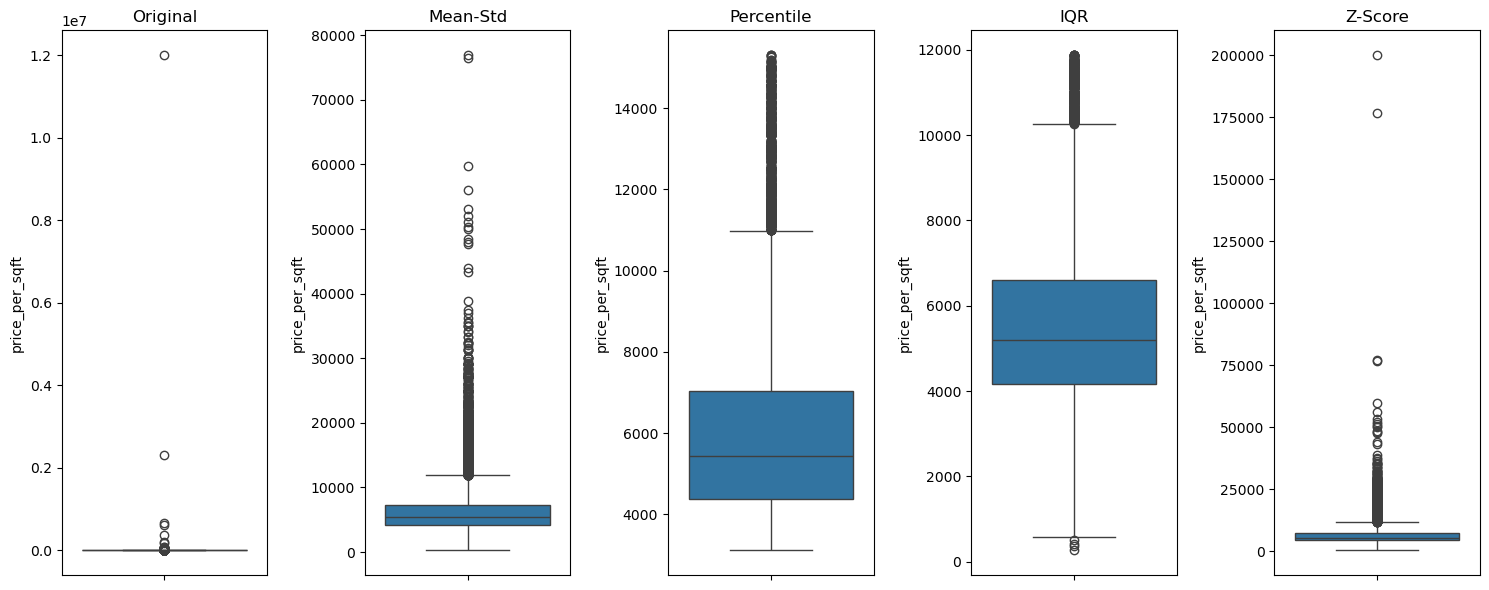

In [27]:
plt.figure(figsize=(15, 6))

# Original
plt.subplot(1, 5, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original')

# Mean-Std
plt.subplot(1, 5, 2)
sns.boxplot(y=df_mean_std['price_per_sqft'])
plt.title('Mean-Std')

# Percentile
plt.subplot(1, 5, 3)
sns.boxplot(y=df_percentile['price_per_sqft'])
plt.title('Percentile')

# IQR
plt.subplot(1, 5, 4)
sns.boxplot(y=df_iqr['price_per_sqft'])
plt.title('IQR')

# Z-Score
plt.subplot(1, 5, 5)
sns.boxplot(y=df_zscore['price_per_sqft'])
plt.title('Z-Score')

plt.tight_layout()
plt.show()


Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

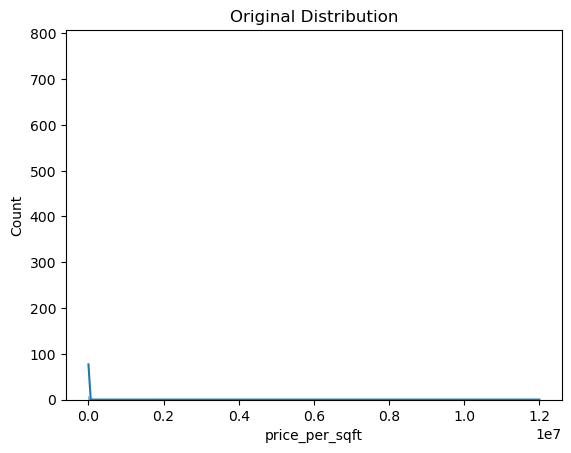

Skewness: 108.28105905387405
Kurtosis: 12095.215634799732


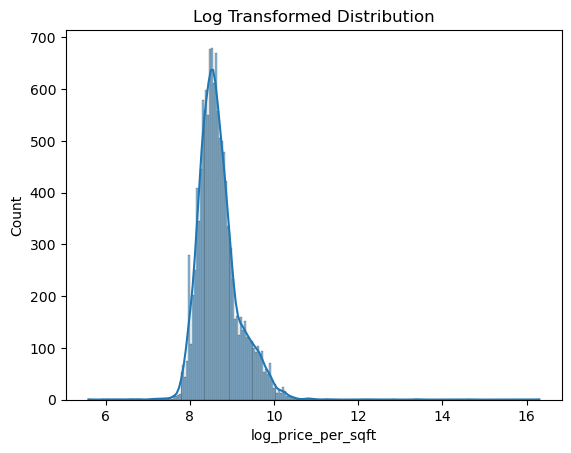

Skewness (log): 1.4007506880692204
Kurtosis (log): 9.208005671057725


In [28]:
# Original histplot
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Original Distribution")
plt.show()

# Skewness and Kurtosis before transformation
print("Skewness:", df['price_per_sqft'].skew())
print("Kurtosis:", df['price_per_sqft'].kurt())

# Log transform
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

# After transformation
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title("Log Transformed Distribution")
plt.show()

# After transformation skew and kurtosis
print("Skewness (log):", df['log_price_per_sqft'].skew())
print("Kurtosis (log):", df['log_price_per_sqft'].kurt())



Q5. Check the correlation between all the numerical columns and plot heatmap.  

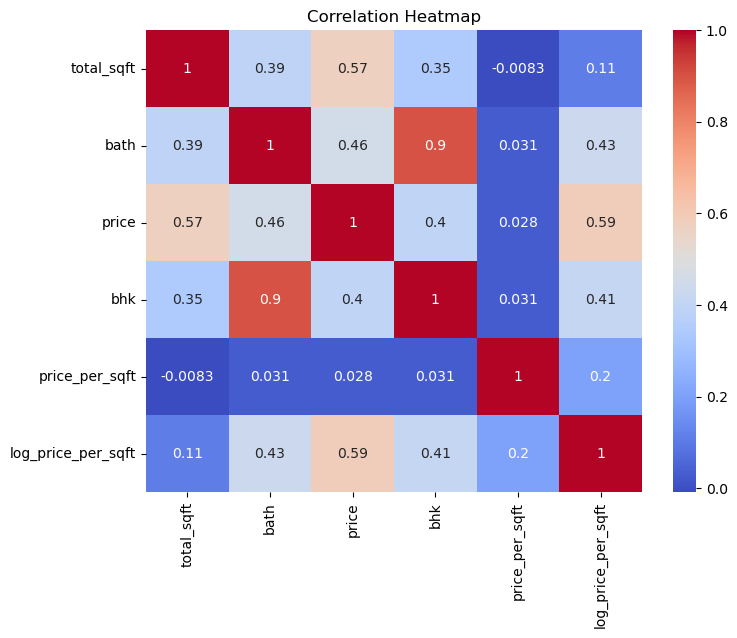

In [29]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Q6. Draw Scatter plot between the variables to check the correlation between them.

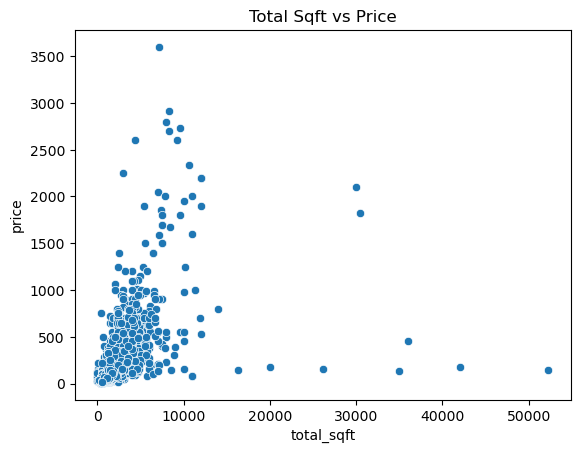

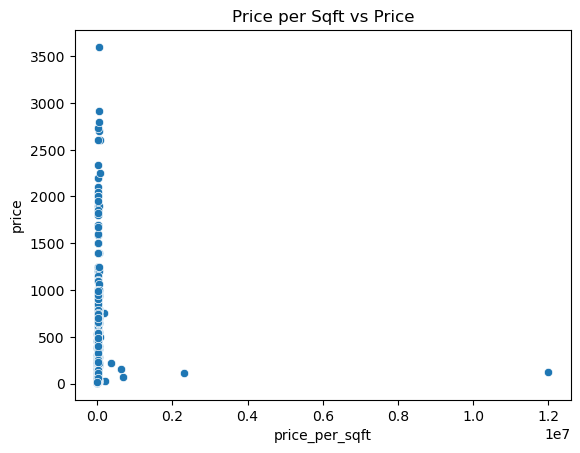

In [30]:
# total_sqft vs price
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Total Sqft vs Price')
plt.show()

# price_per_sqft vs price
sns.scatterplot(data=df, x='price_per_sqft', y='price')
plt.title('Price per Sqft vs Price')
plt.show()
